# Asset Portfolio Management using Deep Reinforcement Learning
---

## 5.0 Feature Reduction
---

Autoencoders are used to reduce the number of technical indicators to be represented by only two features

### 5.1 Import Relevant Libraries

In [200]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

In [201]:
# lstm autoencoder recreate sequence
from numpy import array
from keras.models import Model, Sequential
from keras.layers import Input
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model

from sklearn import preprocessing

### 5.2 Load the Data

In [274]:
%store -r df

In [275]:
df.head()

,date,tic,close,high,low,open,volume,atr,bbw,obv,cmf,macd,adx,sma,ema,cci,rsi,cov_list
0,2009-03-20,AXP,10.072534,13.19,12.12,13.190000,31088200.0,16.678314,243.395109,-1.445076e+10,-14.875466,-2.758666,5.959579,21.112451,18.906621,-76.944259,46.527407,"[[0.002610715086827884, 0.0012647352623545009,..."
1,2009-03-20,DIS,15.026185,17.98,17.08,17.799999,17766600.0,18.208550,242.540988,-1.441968e+10,-14.772689,-2.079888,5.944065,23.204316,20.512819,-57.177326,47.834794,"[[0.002610715086827884, 0.0012647352623545009,..."
2,2009-03-20,HD,16.652840,22.73,21.76,22.590000,22361800.0,16.276229,243.588752,-1.442840e+10,-14.632660,-2.734109,5.686130,19.282005,18.559885,-41.654768,48.539462,"[[0.002610715086827884, 0.0012647352623545009,..."
3,2009-03-20,IBM,64.557983,95.00,92.18,93.160004,12193900.0,21.418925,243.773182,-1.447454e+10,-13.786223,2.275133,7.138456,20.680496,27.180991,218.356625,60.801785,"[[0.002610715086827884, 0.0012647352623545009,..."
4,2009-03-20,INTC,10.250909,15.40,14.35,15.190000,84639100.0,14.878890,244.037410,-1.451304e+10,-13.949048,-3.194407,5.647357,18.807598,17.281581,-70.446011,46.698434,"[[0.002610715086827884, 0.0012647352623545009,..."


In [276]:
# Get the list of all the features
features_list = list(df.columns)[7:-1]

In [277]:
print(features_list)

['atr', 'bbw', 'obv', 'cmf', 'macd', 'adx', 'sma', 'ema', 'cci', 'rsi']


### 5.2 Construct a Data Frame of Features

In [278]:
# construct a data frame of features
features_df = df[features_list]
features_df.index = df['date']

In [279]:
features_df.head()

,atr,bbw,obv,cmf,macd,adx,sma,ema,cci,rsi
date,,,,,,,,,,
2009-03-20,16.678314,243.395109,-1.445076e+10,-14.875466,-2.758666,5.959579,21.112451,18.906621,-76.944259,46.527407
2009-03-20,18.208550,242.540988,-1.441968e+10,-14.772689,-2.079888,5.944065,23.204316,20.512819,-57.177326,47.834794
2009-03-20,16.276229,243.588752,-1.442840e+10,-14.632660,-2.734109,5.686130,19.282005,18.559885,-41.654768,48.539462
2009-03-20,21.418925,243.773182,-1.447454e+10,-13.786223,2.275133,7.138456,20.680496,27.180991,218.356625,60.801785
2009-03-20,14.878890,244.037410,-1.451304e+10,-13.949048,-3.194407,5.647357,18.807598,17.281581,-70.446011,46.698434


In [280]:
features_df.shape

(59360, 10)

In [281]:
df.shape

(59360, 18)

### 5.3 Normalize the Features and Construct an Autoencoder

In [282]:
features_array = np.array(features_df)

features_scaler = preprocessing.MinMaxScaler()
features_normalised = features_scaler.fit_transform(features_array)

In [283]:
features_normalised.shape

(59360, 10)

In [284]:
# rescale the features array
features_normalised = features_normalised.reshape(-1,20,10)

In [285]:
features_normalised.shape

(2968, 20, 10)

In [286]:
# define model
model = Sequential()
model.add(LSTM(4, activation='relu', input_shape=(20,10)))
model.add(RepeatVector(20))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(10)))
model.compile(optimizer='adam', loss='mse')

Epoch 1/100
93/93 [==============================] - 2s 23ms/step - loss: 0.0705
Epoch 2/100
93/93 [==============================] - 2s 19ms/step - loss: 0.0140
Epoch 3/100
93/93 [==============================] - 2s 19ms/step - loss: 0.0097: 0s - loss
Epoch 4/100
93/93 [==============================] - 2s 19ms/step - loss: 0.0088
Epoch 5/100
93/93 [==============================] - 2s 19ms/step - loss: 0.0080: 0s - 
Epoch 6/100
93/93 [==============================] - 2s 19ms/step - loss: 0.0060
Epoch 7/100
93/93 [==============================] - 2s 19ms/step - loss: 0.0049
Epoch 8/100
93/93 [==============================] - 2s 18ms/step - loss: 0.0043
Epoch 9/100
93/93 [==============================] - 2s 21ms/step - loss: 0.0039
Epoch 10/100
93/93 [==============================] - 3s 28ms/step - loss: 0.0033: 0s - loss: 
Epoch 11/100
93/93 [==============================] - 2s 25ms/step - loss: 0.0030
Epoch 12/100
93/93 [==============================] - 2s 20ms/step - loss: 0

93/93 [==============================] - 2s 23ms/step - loss: 4.9410e-04
Epoch 96/100
93/93 [==============================] - 2s 23ms/step - loss: 5.0314e-04
Epoch 97/100
93/93 [==============================] - 2s 21ms/step - loss: 4.8456e-04
Epoch 98/100
93/93 [==============================] - 2s 23ms/step - loss: 4.7781e-04
Epoch 99/100
93/93 [==============================] - 2s 22ms/step - loss: 4.6631e-04
Epoch 100/100
93/93 [==============================] - 2s 20ms/step - loss: 4.6408e-04


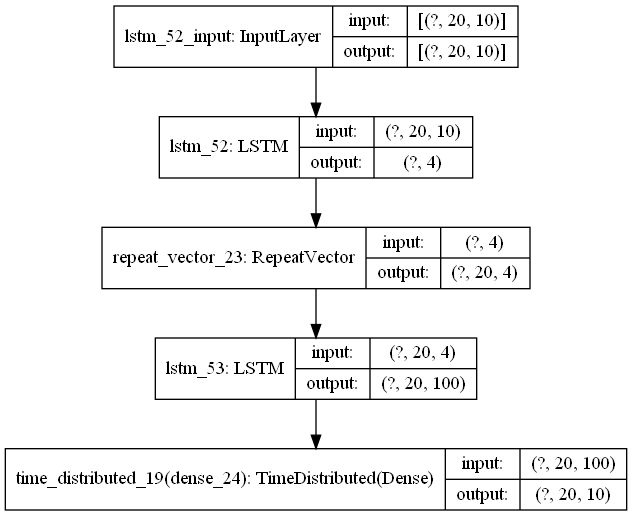

In [287]:
# fit model
model.fit(features_normalised, features_normalised, epochs=100, verbose=1)
plot_model(model, show_shapes=True, to_file='./results/reconstruct_lstm_autoencoder.png')

In [256]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_50 (LSTM)               (None, 4)                 240       
_________________________________________________________________
repeat_vector_22 (RepeatVect (None, 20, 4)             0         
_________________________________________________________________
lstm_51 (LSTM)               (None, 20, 100)           42000     
_________________________________________________________________
time_distributed_18 (TimeDis (None, 20, 10)            1010      
Total params: 43,250
Trainable params: 43,250
Non-trainable params: 0
_________________________________________________________________


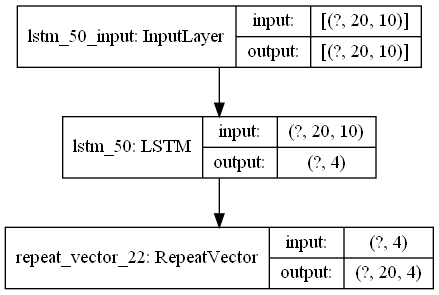

In [273]:
# connect the encoder LSTM as the output layer
model_feature = Model(inputs=model.inputs, outputs=model.layers[1].output)
plot_model(model_feature, show_shapes=True, show_layer_names=True, to_file='./results/lstm_encoder.png')

In [258]:
model_feature.summary()

Model: "functional_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_50_input (InputLayer)   [(None, 20, 10)]          0         
_________________________________________________________________
lstm_50 (LSTM)               (None, 4)                 240       
_________________________________________________________________
repeat_vector_22 (RepeatVect (None, 20, 4)             0         
Total params: 240
Trainable params: 240
Non-trainable params: 0
_________________________________________________________________


### 5.4 Get the Reconstructed Features

In [259]:
# get the feature vector for the input sequence
yhat = model_feature.predict(features_normalised)
print(yhat.shape)

(2968, 20, 4)


In [260]:
# reshape the vector
features_reduced = yhat.reshape(-1,4)

In [261]:
df.shape

(59360, 18)

In [262]:
features_reduced.shape

(59360, 4)

In [263]:
# Copy original data frame and drop the original features
df_reduced = df.copy()
df_reduced = df_reduced .drop(features_list, axis=1)

In [264]:
df_reduced.head()

,date,tic,close,high,low,open,volume,cov_list
0,2009-03-20,AXP,10.072534,13.19,12.12,13.190000,31088200.0,"[[0.002610715086827884, 0.0012647352623545009,..."
1,2009-03-20,DIS,15.026185,17.98,17.08,17.799999,17766600.0,"[[0.002610715086827884, 0.0012647352623545009,..."
2,2009-03-20,HD,16.652840,22.73,21.76,22.590000,22361800.0,"[[0.002610715086827884, 0.0012647352623545009,..."
3,2009-03-20,IBM,64.557983,95.00,92.18,93.160004,12193900.0,"[[0.002610715086827884, 0.0012647352623545009,..."
4,2009-03-20,INTC,10.250909,15.40,14.35,15.190000,84639100.0,"[[0.002610715086827884, 0.0012647352623545009,..."


In [265]:
# convert the reduced features to a data frame and merge with the original data frame
features_reduced_df = pd.DataFrame(features_reduced, columns=['f01','f02','f03','f04'])

In [268]:
features_reduced_df.head()

,f01,f02,f03,f04
0,1.764112,0.488414,5.262903,5.777148
1,1.764112,0.488414,5.262903,5.777148
2,1.764112,0.488414,5.262903,5.777148
3,1.764112,0.488414,5.262903,5.777148
4,1.764112,0.488414,5.262903,5.777148


In [269]:
df_reduced[['f01','f02','f03','f04']] = features_reduced_df[['f01','f02','f03','f04']]

In [270]:
df_reduced.head()

,date,tic,close,high,low,open,volume,cov_list,f01,f02,f03,f04
0,2009-03-20,AXP,10.072534,13.19,12.12,13.190000,31088200.0,"[[0.002610715086827884, 0.0012647352623545009,...",1.764112,0.488414,5.262903,5.777148
1,2009-03-20,DIS,15.026185,17.98,17.08,17.799999,17766600.0,"[[0.002610715086827884, 0.0012647352623545009,...",1.764112,0.488414,5.262903,5.777148
2,2009-03-20,HD,16.652840,22.73,21.76,22.590000,22361800.0,"[[0.002610715086827884, 0.0012647352623545009,...",1.764112,0.488414,5.262903,5.777148
3,2009-03-20,IBM,64.557983,95.00,92.18,93.160004,12193900.0,"[[0.002610715086827884, 0.0012647352623545009,...",1.764112,0.488414,5.262903,5.777148
4,2009-03-20,INTC,10.250909,15.40,14.35,15.190000,84639100.0,"[[0.002610715086827884, 0.0012647352623545009,...",1.764112,0.488414,5.262903,5.777148


In [271]:
data_df = df_reduced.copy()

In [272]:
%store data_df

Stored 'data_df' (DataFrame)
